In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # это библиотека для управления warning'ами — то есть различными предупреждениями
                # ниже мы с помощью нее игнорим лишние предупреждения
                # мы можем это убрать, но где-то всплывали ворнинги, и чтобы они не раздражали и не вызывали вопросов, мы их отключим

warnings.filterwarnings('ignore')

In [3]:
data_revenue = pd.read_excel('data.xlsx', sheet_name="DATA")

data_revenue.head()

,Date,Revenue,Company
0,2017-09-07,40.314999,APPLE
1,2017-09-07,173.210007,APPLE
2,2017-09-07,173.210007,SAMSUNG
3,2017-09-08,39.657501,APPLE
4,2017-09-08,170.949997,APPLE


In [4]:
data_revenue.shape

(3774, 3)

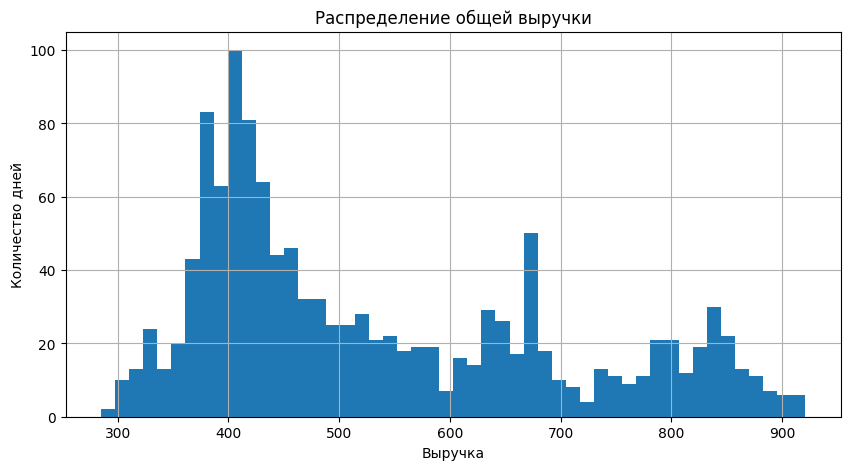

In [5]:
# суммарная выручка по всем филиалам

plt.figure(figsize=(10, 5))
plt.title('Распределение общей выручки') 
plt.xlabel('Выручка') 
plt.ylabel('Количество дней') 
plt.grid() 

plt.hist(data_revenue.groupby('Date')['Revenue'].sum(), bins=50) 

plt.show()

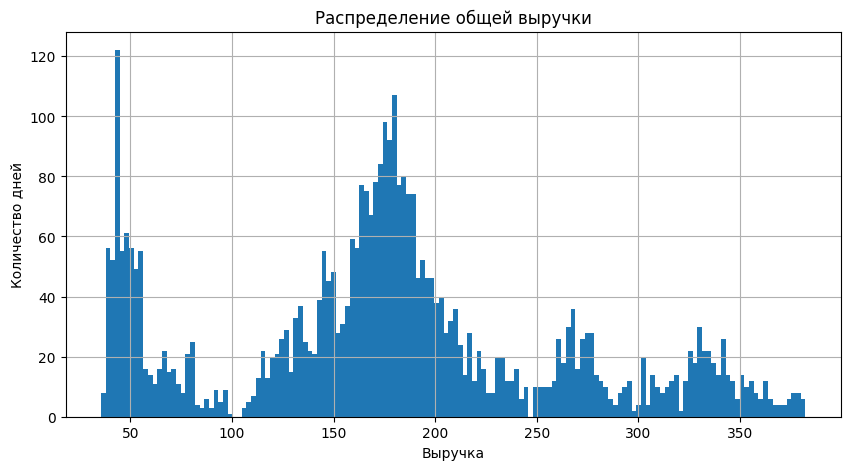

In [6]:
plt.figure(figsize=(10, 5)) 
plt.title('Распределение общей выручки') 
plt.xlabel('Выручка') 
plt.ylabel('Количество дней') 
plt.grid() 

plt.hist(data_revenue['Revenue'], bins=150) # можем увеличить втрое количество бинов, чтобы визуализация была точнее

plt.show()

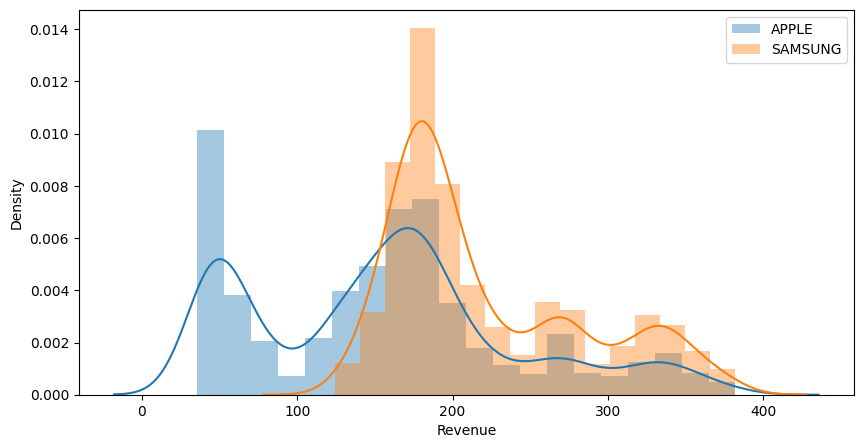

In [7]:
plt.figure(figsize=(10, 5)) 

filial = pd.unique(data_revenue['Company']) # сделаем серию со списком филиалов

for f in filial: # фильтр по филиалу
    sns.distplot(data_revenue.loc[data_revenue['Company'] == f]['Revenue'], label = f)
    
plt.legend()

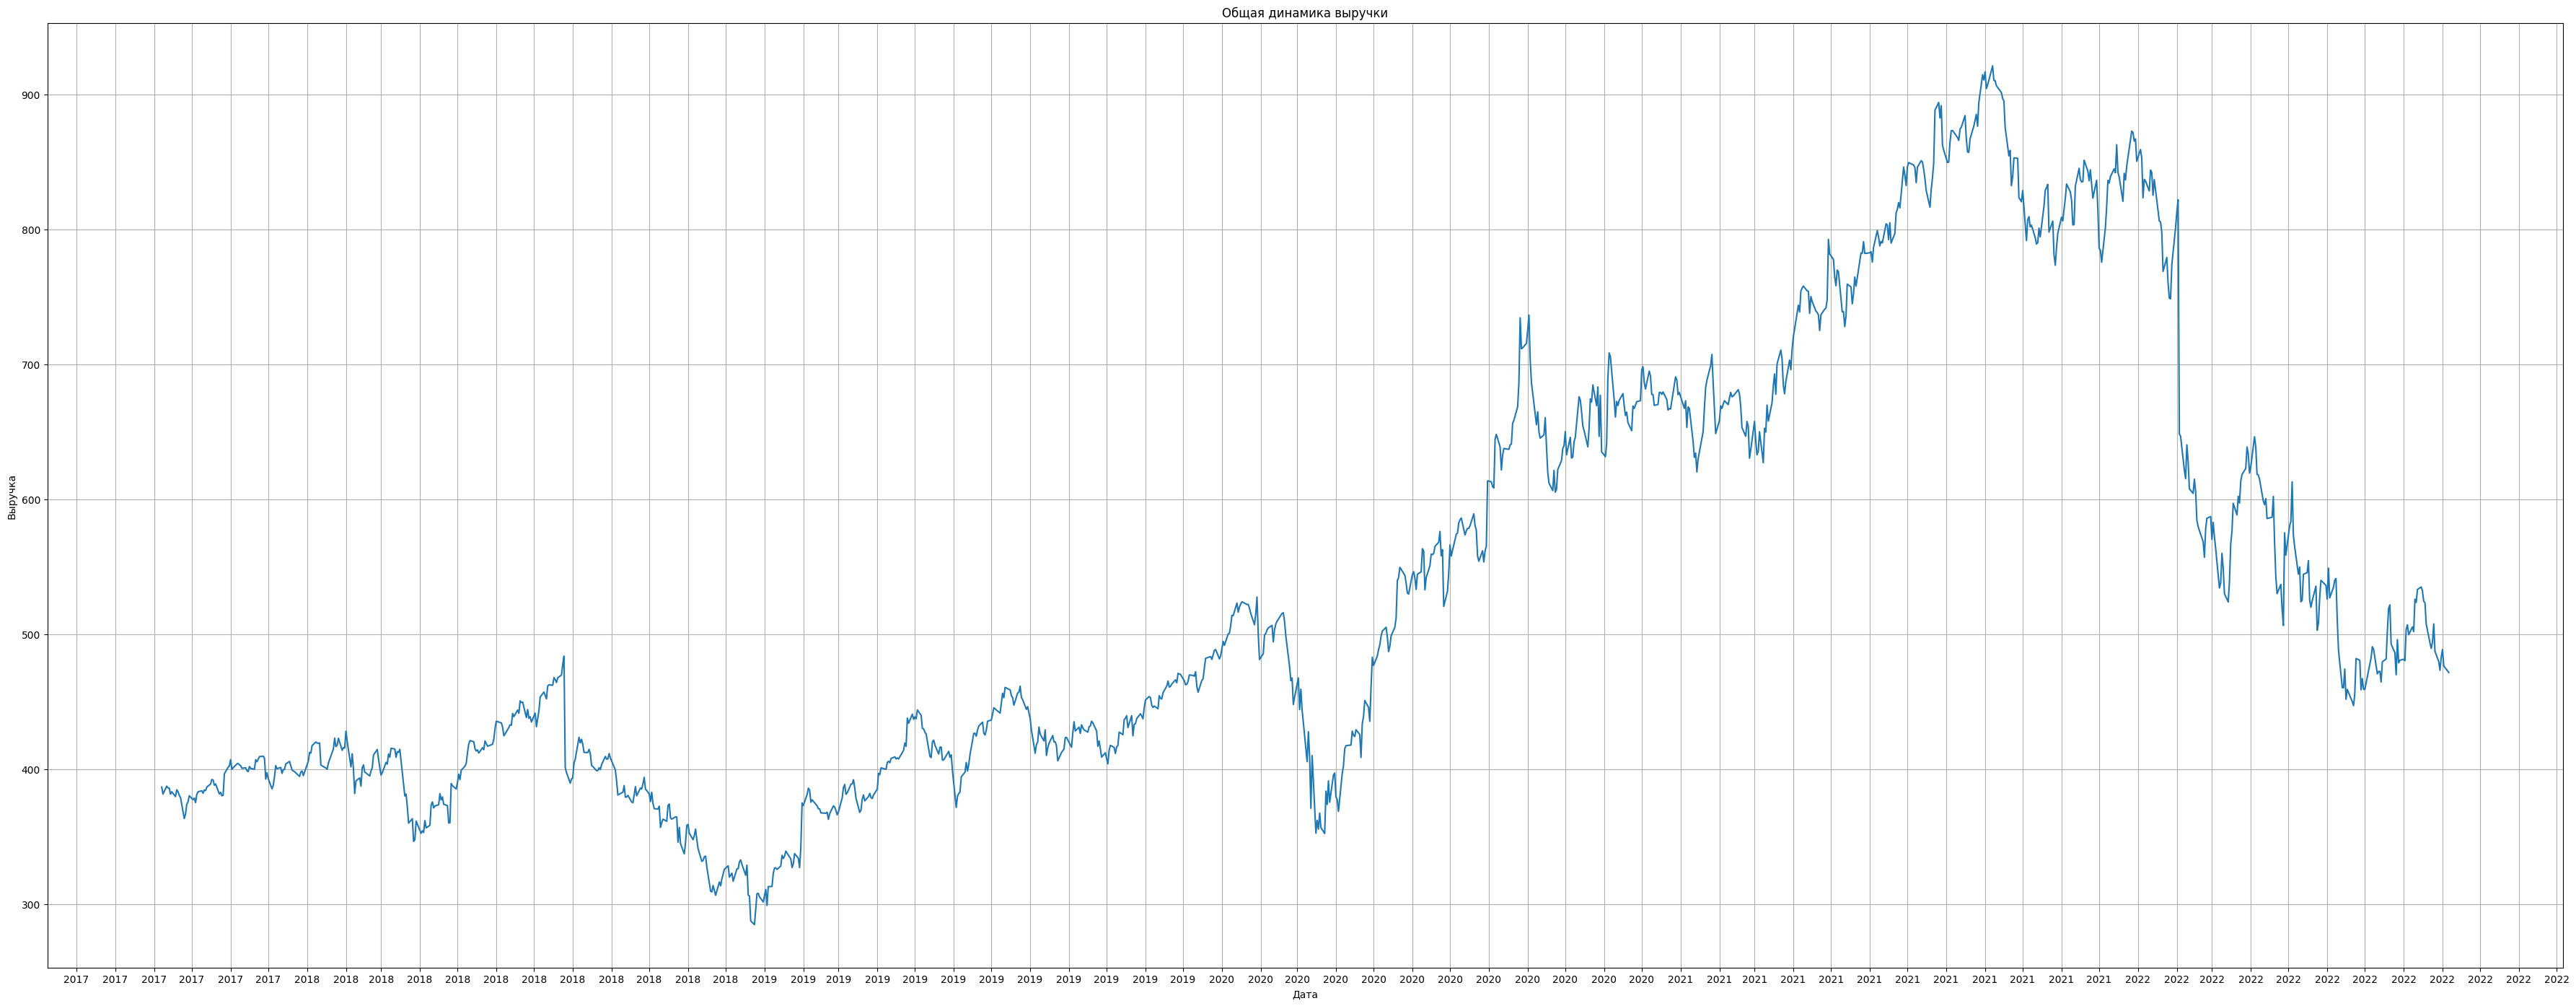

In [8]:
import matplotlib.dates as mdates #импортируем для локаторов

# суммарная выручка
plt.figure(figsize = (45, 17))

plt.title('Общая динамика выручки') 
plt.xlabel('Дата') 
plt.ylabel('Выручка') 
plt.grid()
locator = mdates.MonthLocator() # передадим, что хотим подписи помесячно
X = plt.gca().xaxis # обращаемся к оси х
X.set_major_locator(locator) # передадим в ось параметры локатора
sns.lineplot(x = data_revenue.groupby('Date')['Revenue'].sum().index, # .index, чтобы взять дату по оси x
             y = data_revenue.groupby('Date')['Revenue'].sum()
            )
plt.show()

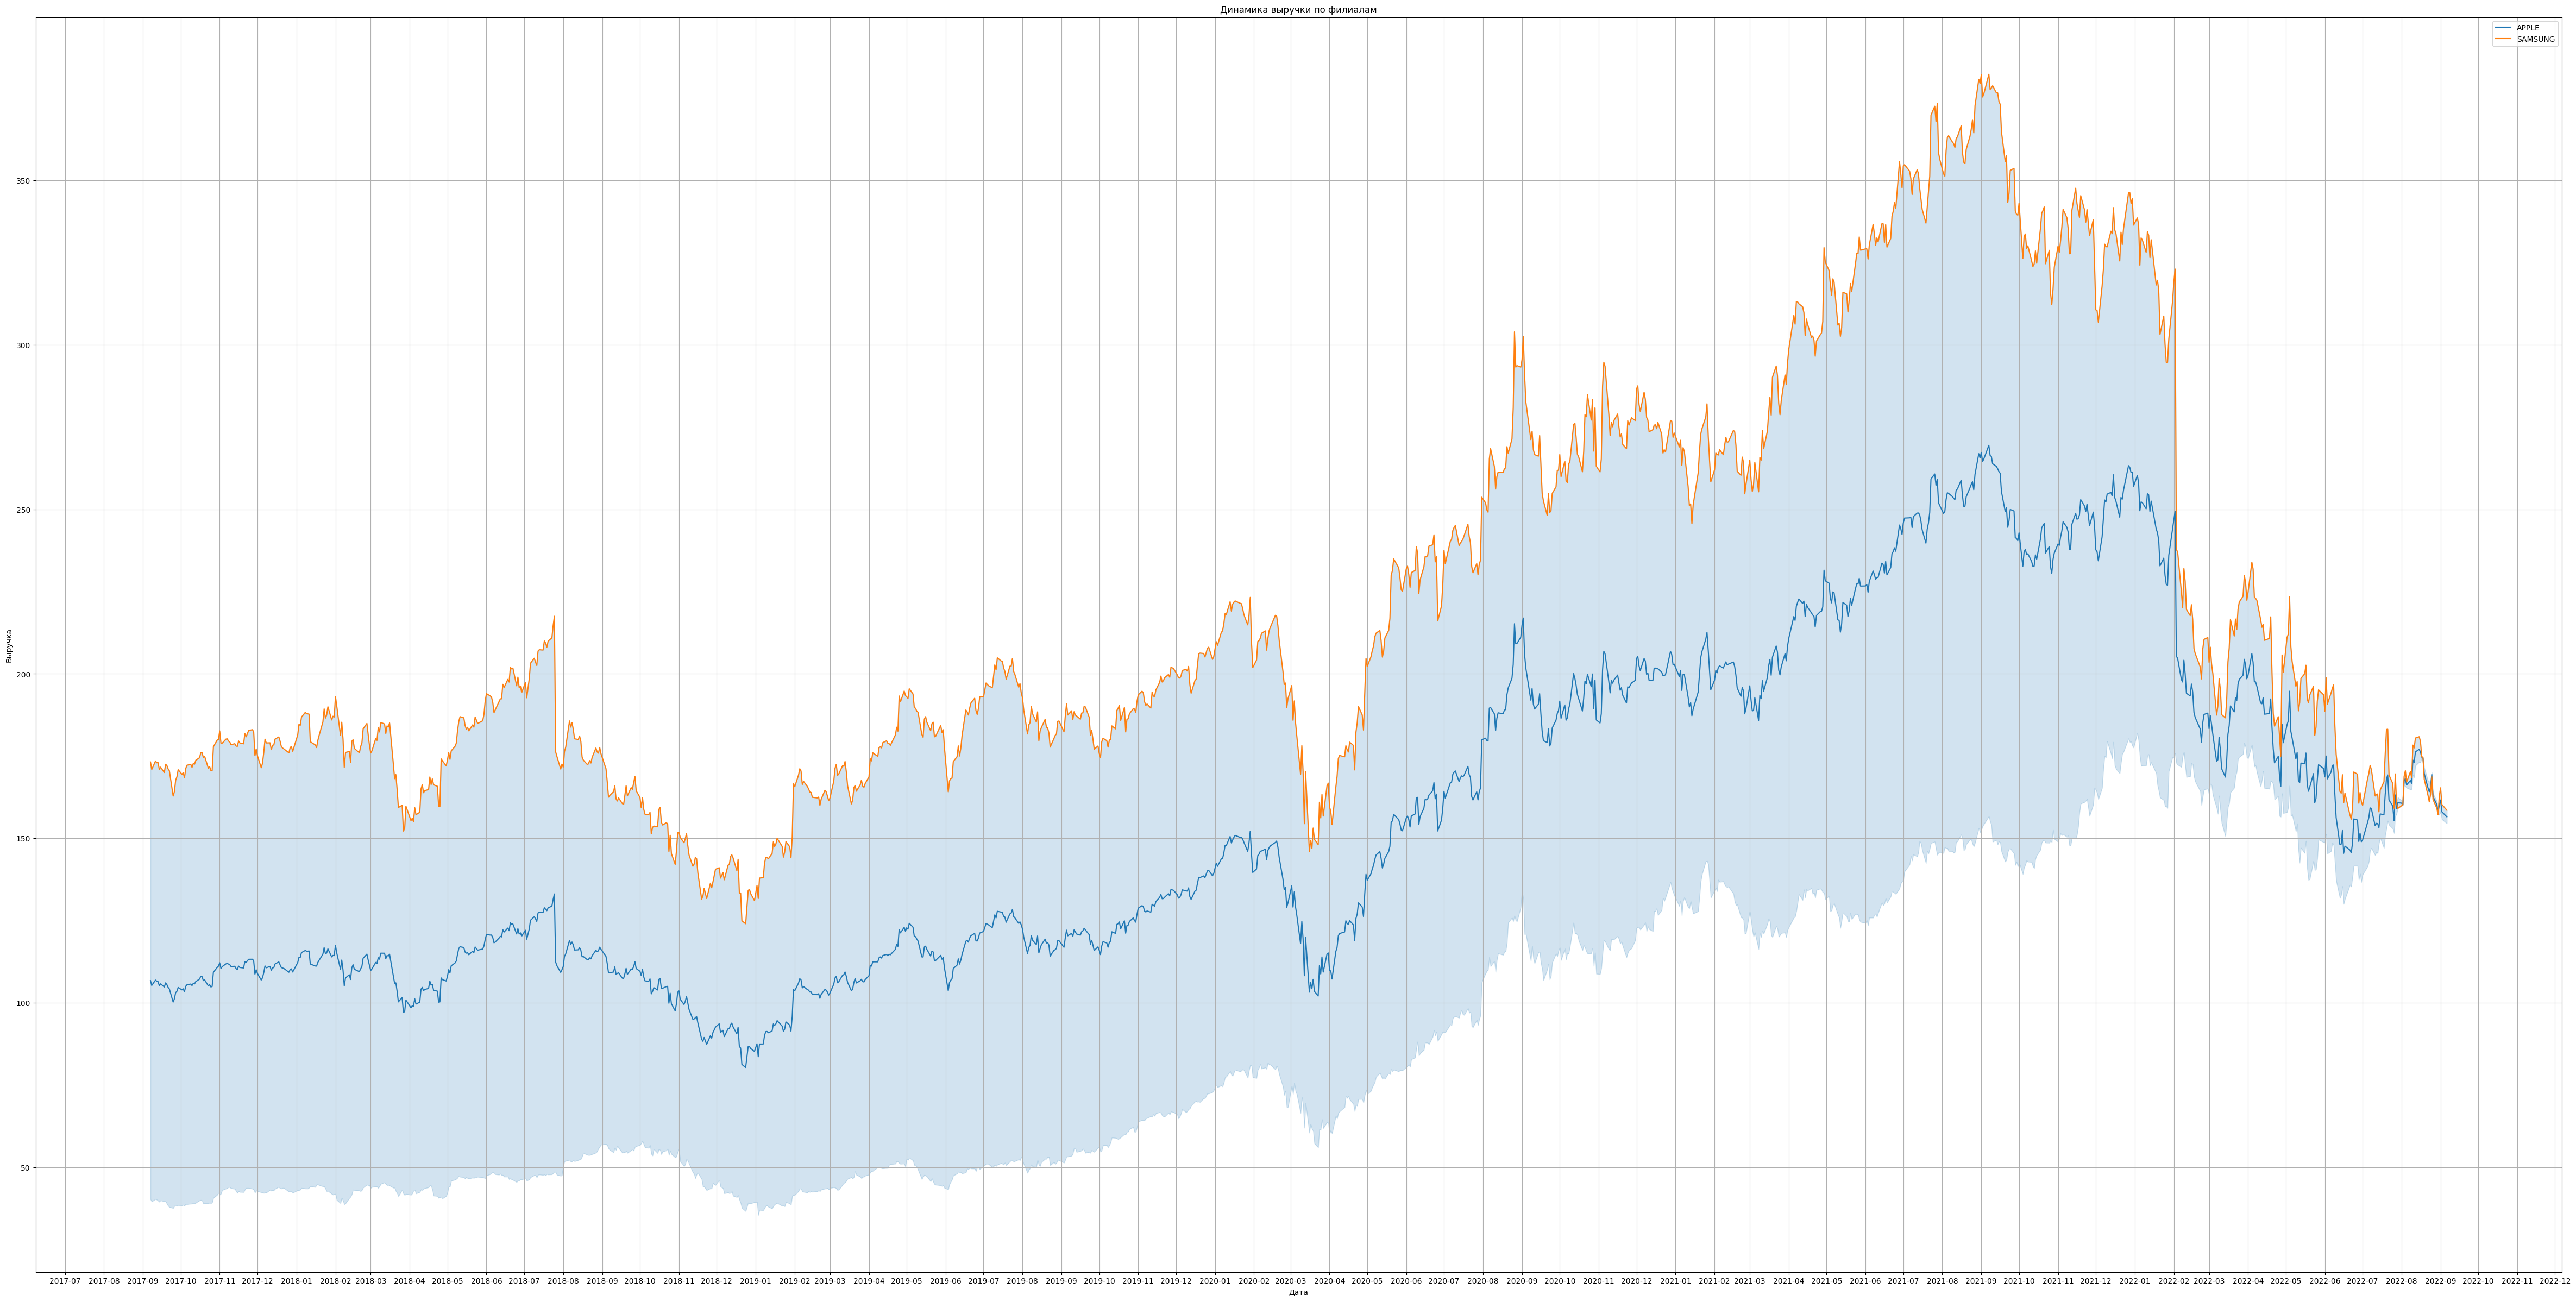

In [9]:
# выручка по филиалам
plt.figure(figsize = (60, 30))

plt.title('Динамика выручки по филиалам') 
plt.xlabel('Дата') 
plt.ylabel('Выручка') 
plt.grid()
for f in pd.unique(data_revenue['Company']):
    sns.lineplot( 
                 x = data_revenue.loc[data_revenue['Company'] == f]['Date'], 
                 y = data_revenue.loc[data_revenue['Company'] == f]['Revenue'], 
                 label = f);
    
locator = mdates.MonthLocator()
X = plt.gca().xaxis
X.set_major_locator(locator)

Можно сделать следующие выводы и прогнозы:

Начиная с 2020 года наблюдается резкий скачок выручки обоих компаний. Затем в начале 2022 года начинается колоссальный спад доходов компаний

In [10]:
train = data_revenue.loc[data_revenue['Date'] < '2022-07']
test = data_revenue.loc[data_revenue['Date'] >= '2022-07']

train.shape, test.shape

((3636, 3), (138, 3))

In [11]:
train_0 = train.groupby(['Date'])['Revenue'].sum().reset_index() # сгруппировали данные обучающей выборки
test_0 = test.groupby(['Date'])['Revenue'].sum().reset_index() # сгруппировали данные контрольной выборки

In [12]:
train_0.head()

,Date,Revenue
0,2017-09-07,386.735013
1,2017-09-08,381.557495
2,2017-09-11,387.394990
3,2017-09-12,386.135014
4,2017-09-13,386.012504


In [13]:
from prophet import Prophet

In [14]:
model = Prophet()
model

In [15]:
train_0.head()

,Date,Revenue
0,2017-09-07,386.735013
1,2017-09-08,381.557495
2,2017-09-11,387.394990
3,2017-09-12,386.135014
4,2017-09-13,386.012504


In [16]:
test_0.head()

,Date,Revenue
0,2022-07-01,458.989991
1,2022-07-05,477.940002
2,2022-07-06,482.460006
3,2022-07-07,490.730010
4,2022-07-08,488.800003


In [17]:
train_0.columns = ['ds', 'y'] # переименовали столбцы

test_0.columns = ['ds', 'y']

In [18]:
model.fit(train_0) # подогнали модель под наши данные

16:25:31 - cmdstanpy - INFO - Chain [1] start processing


16:25:31 - cmdstanpy - INFO - Chain [1] done processing


In [69]:
future = model.make_future_dataframe(periods=46) # говорим профету сделать дата-фрейм на 46 дней
future.tail(46) # выводим 46 строк с конца

,ds
1212,2022-07-01
1213,2022-07-02
1214,2022-07-03
1215,2022-07-04
1216,2022-07-05
1217,2022-07-06
1218,2022-07-07
1219,2022-07-08
1220,2022-07-09
1221,2022-07-10


In [70]:
forecast = model.predict(future)
forecast.head() # возвращает много колонок

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-09-07,348.626631,343.707837,425.388018,348.626631,348.626631,40.384396,40.384396,40.384396,-7.469006,-7.469006,-7.469006,47.853403,47.853403,47.853403,0.0,0.0,0.0,389.011027
1,2017-09-08,349.062900,346.065628,430.856762,349.062900,349.062900,39.058031,39.058031,39.058031,-7.367575,-7.367575,-7.367575,46.425606,46.425606,46.425606,0.0,0.0,0.0,388.120931
2,2017-09-11,350.371707,343.749713,425.047084,350.371707,350.371707,34.601911,34.601911,34.601911,-6.603969,-6.603969,-6.603969,41.205880,41.205880,41.205880,0.0,0.0,0.0,384.973617
3,2017-09-12,350.807976,343.686754,424.451417,350.807976,350.807976,33.075931,33.075931,33.075931,-6.175689,-6.175689,-6.175689,39.251620,39.251620,39.251620,0.0,0.0,0.0,383.883906
4,2017-09-13,351.244245,343.115503,423.794643,351.244245,351.244245,30.804366,30.804366,30.804366,-6.436531,-6.436531,-6.436531,37.240898,37.240898,37.240898,0.0,0.0,0.0,382.048611


In [71]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() # оставим только нужные

,ds,yhat,yhat_lower,yhat_upper
1253,2022-08-11,521.216538,476.349905,561.871232
1254,2022-08-12,521.893440,478.276803,561.658574
1255,2022-08-13,547.070065,503.864644,589.193169
1256,2022-08-14,548.043874,505.477300,592.138697
1257,2022-08-15,525.558339,484.924052,568.507358


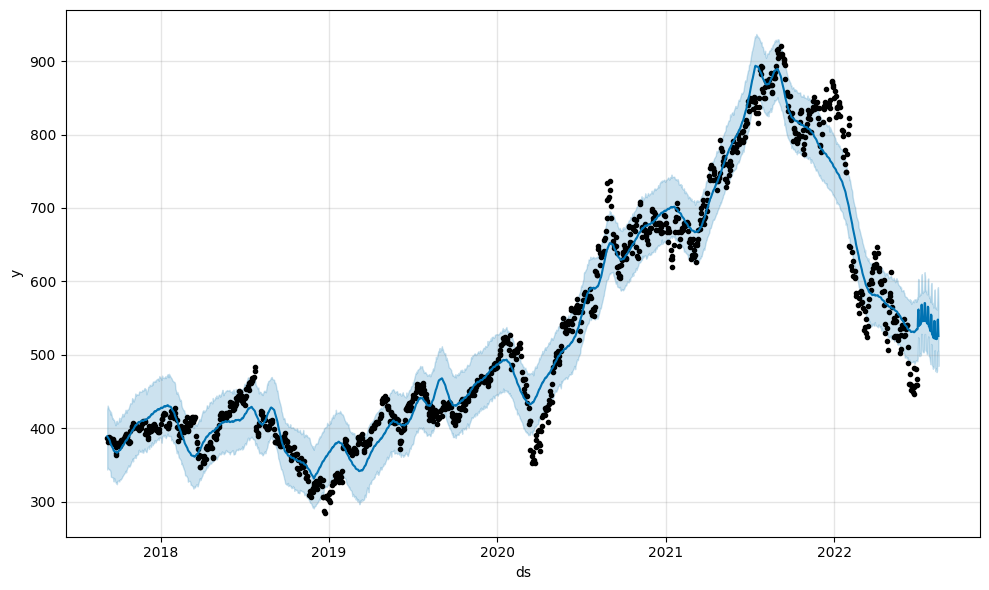

In [72]:
model.plot(forecast);

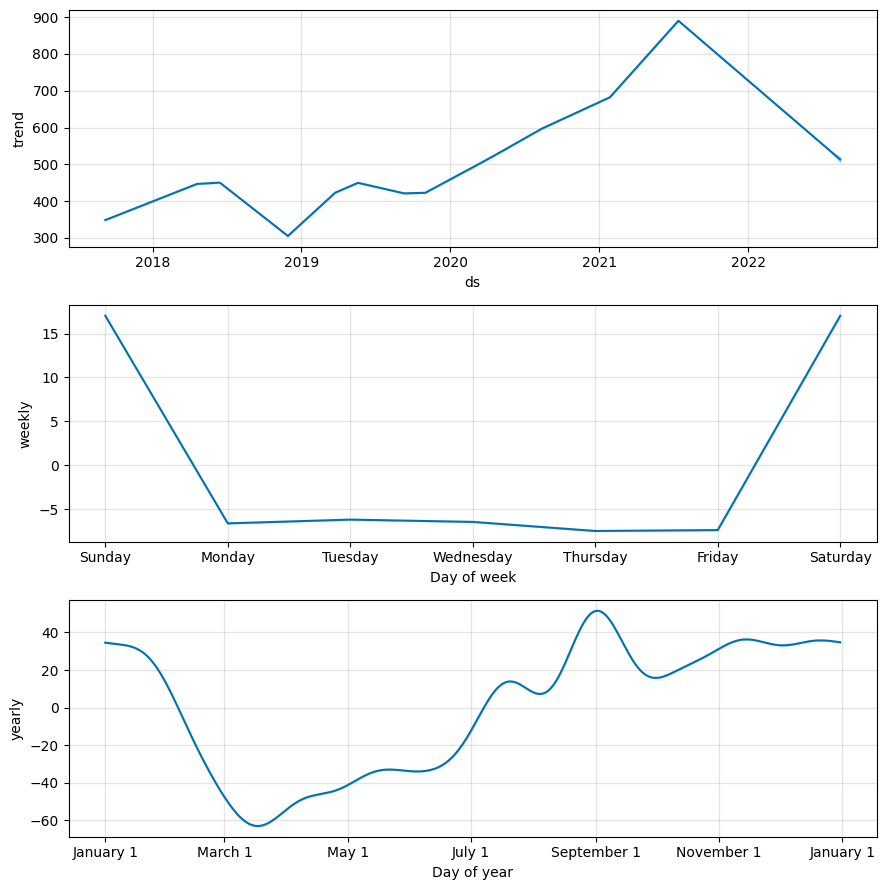

In [73]:
model.plot_components(forecast);

In [74]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(forecast['yhat'].tail(46), test_0['y']) 

48.89314188605567

In [75]:
modul_dif = np.abs(forecast.tail(46).reset_index()['yhat'] - test_0['y']) # положим модули отклонений от прогноза в отдельную переменную

dif = np.mean(modul_dif/test_0['y']) # считаем среднее арифметическое отклонение 

dif_percent = dif*100 # получаем процент

dif_percent

10.090592454951816

In [76]:
train_1 = train.loc[train['Company'] == "APPLE",['Date','Revenue']].rename({'Date':'ds','Revenue':'y'},axis=1) 
train_2 = train.loc[train['Company'] == "SAMSUNG",['Date','Revenue']].rename({'Date':'ds','Revenue':'y'},axis=1)

In [77]:
test_1 = test.loc[test['Company'] == "APPLE",['Date','Revenue']].rename({'Date':'ds','Revenue':'y'},axis=1) 
test_2 = test.loc[test['Company'] == "SAMSUNG",['Date','Revenue']].rename({'Date':'ds','Revenue':'y'},axis=1)

In [78]:
m_1 = Prophet() # модель первого филиала
m_1.fit(train_1) # подгоняем модель под наши данные

m_2 = Prophet()
m_2.fit(train_2)


16:34:34 - cmdstanpy - INFO - Chain [1] start processing
16:34:34 - cmdstanpy - INFO - Chain [1] done processing
16:34:34 - cmdstanpy - INFO - Chain [1] start processing
16:34:34 - cmdstanpy - INFO - Chain [1] done processing


In [79]:
forecast_1 = m_1.predict(future) # датасет с прогнозом для первого филиала
forecast_2 = m_2.predict(future) # датасет с прогнозом для второго филиала

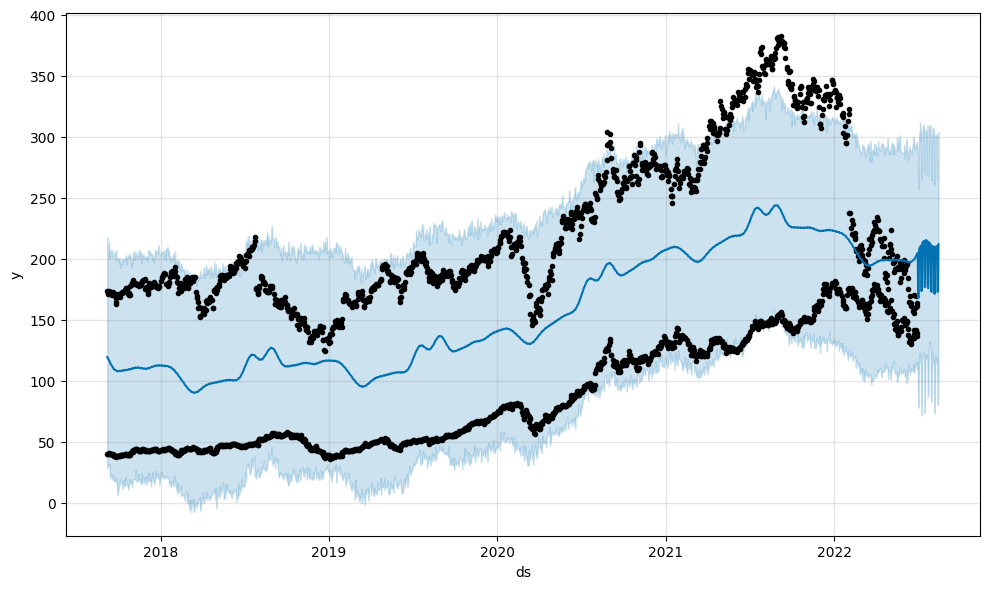

In [80]:
m_1.plot(forecast_1); 

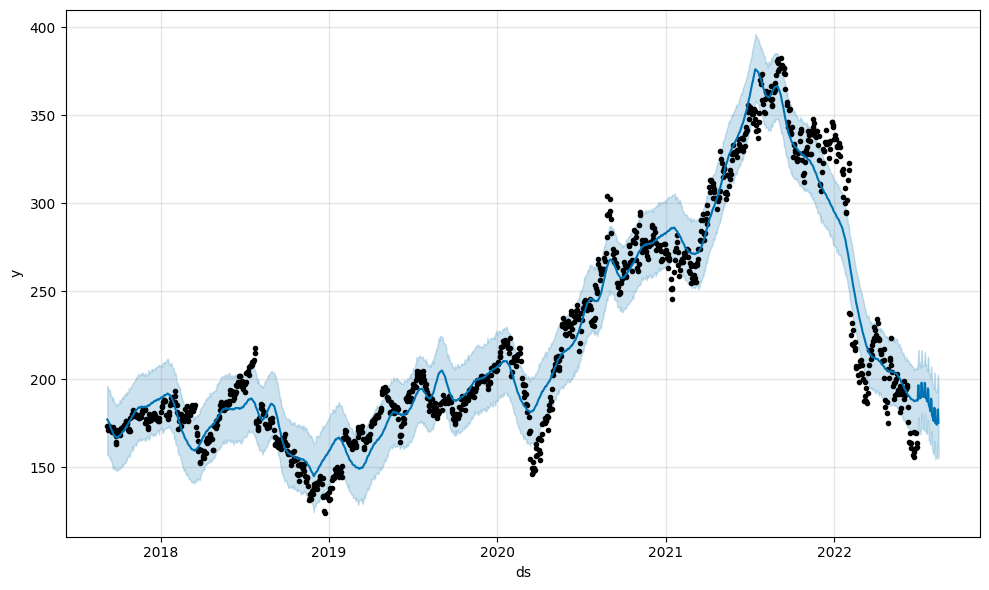

In [81]:
m_2.plot(forecast_2);

In [82]:
error_forecast_1 = mean_absolute_error(forecast_1['yhat'].tail(92), test_1['y'])
error_forecast_2 = mean_absolute_error(forecast_2['yhat'].tail(46), test_2['y'])

error_forecast_1, error_forecast_2

(36.48986045240769, 18.598833578017057)

In [84]:
modul_dif_1 = np.abs(forecast_1.tail(46).reset_index()['yhat'] - test_1.reset_index()['y'])
dif_percent_1 = np.mean(modul_dif_1/test_1.reset_index()['y'])*100

modul_dif_2 = np.abs(forecast_2.tail(46).reset_index()['yhat'] - test_2.reset_index()['y'])
dif_percent_2 = np.mean(modul_dif_2/test_2.reset_index()['y'])*100

dif_percent_1, dif_percent_2

(26.159913234672118, 11.285105180459933)

In [85]:
m_1 = Prophet(daily_seasonality = True, seasonality_mode='multiplicative',growth="linear")
m_1.fit(train_1)

m_2 = Prophet(daily_seasonality = True, seasonality_mode='multiplicative', growth="linear")
m_2.fit(train_2)

16:34:57 - cmdstanpy - INFO - Chain [1] start processing
16:34:58 - cmdstanpy - INFO - Chain [1] done processing
16:34:58 - cmdstanpy - INFO - Chain [1] start processing
16:34:59 - cmdstanpy - INFO - Chain [1] done processing


In [86]:
forecast_1 = m_1.predict(future)
forecast_2 = m_2.predict(future)

In [89]:
error_forecast_1 = mean_absolute_error(forecast_1['yhat'].tail(92), test_1['y'])
error_forecast_2 = mean_absolute_error(forecast_2['yhat'].tail(46), test_2['y'])

error_forecast_1, error_forecast_2

(20.48348106071549, 15.820712033187078)

In [90]:
modul_dif_1 = np.abs(forecast_1.tail(46).reset_index()['yhat'] - test_1.reset_index()['y'])
dif_percent_1 = np.mean(modul_dif_1/test_1.reset_index()['y'])*100

modul_dif_2 = np.abs(forecast_2.tail(46).reset_index()['yhat'] - test_2.reset_index()['y'])
dif_percent_2 = np.mean(modul_dif_2/test_2.reset_index()['y'])*100

dif_percent_1, dif_percent_2

(14.867167262005095, 9.338129237780194)

In [91]:
f1 = forecast_1.tail(46).reset_index()['yhat']
f2 = forecast_2.tail(46).reset_index()['yhat']

total_forecast = f1 + f2

mean_absolute_error(total_forecast, test_0['y'])

159.53365456547456

In [92]:

data_revenue_1 = data_revenue.loc[data_revenue['Company'] == "APPLE"].drop('Company', axis=1).rename({'Date':'ds','Revenue':'y'},axis=1)
data_revenue_2 = data_revenue.loc[data_revenue['Company'] == "SAMSUNG"].drop('Company', axis=1).rename({'Date':'ds','Revenue':'y'},axis=1)


m_1 = Prophet(growth = 'linear', daily_seasonality = True, seasonality_mode='multiplicative')
m_1.fit(data_revenue_1)

m_2 = Prophet(growth = 'linear', daily_seasonality = True, seasonality_mode='multiplicative')
m_2.fit(data_revenue_2)




future = m_1.make_future_dataframe(periods=31)


forecast_1 = m_1.predict(future)
forecast_2 = m_2.predict(future)

16:35:31 - cmdstanpy - INFO - Chain [1] start processing
16:35:31 - cmdstanpy - INFO - Chain [1] done processing
16:35:31 - cmdstanpy - INFO - Chain [1] start processing
16:35:32 - cmdstanpy - INFO - Chain [1] done processing


In [93]:
f1 = forecast_1.tail(46)[['ds','yhat']].set_index('ds')
f2 = forecast_2.tail(46)[['ds','yhat']].set_index('ds')

total_forecast = (f1 + f2)

In [94]:
total_forecast.head()

,yhat
ds,
2022-08-16,326.810504
2022-08-17,327.072272
2022-08-18,326.545117
2022-08-19,326.764408
2022-08-22,327.461759


In [95]:
total_forecast.reset_index(inplace=True)
total_forecast[['ds', 'yhat']]
total_forecast.columns = ['date', 'revenue']

In [96]:
total_forecast.head()

,date,revenue
0,2022-08-16,326.810504
1,2022-08-17,327.072272
2,2022-08-18,326.545117
3,2022-08-19,326.764408
4,2022-08-22,327.461759


In [97]:
total_forecast.to_csv('forecast.csv')